In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import SVG

In [2]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegressionCV

## Building the initial models

In [5]:
data = pd.read_csv("data/taxi_FINAL_FINAL.csv")

In [6]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'duration',
       'time_of_day', 'CRD', 'UNK', 'NOC', 'DIS', 'CSH', 'tip_percent',
       'tip_amount_binned', 'Other', 'Upper East Side', 'Midtown', 'Greenwich',
       'Tribeca', 'Financial District'],
      dtype='object')

In [7]:
data.corr()["tip_percent"]

vendor_id            -0.000255
passenger_count      -0.001052
trip_distance        -0.159390
pickup_longitude     -0.002408
pickup_latitude       0.001147
dropoff_longitude    -0.016566
dropoff_latitude     -0.000834
fare_amount          -0.175120
surcharge            -0.029576
mta_tax                    NaN
tip_amount            0.583361
tolls_amount         -0.000988
total_amount         -0.033176
duration             -0.157743
time_of_day          -0.017448
CRD                   0.117430
UNK                  -0.023336
NOC                  -0.148975
DIS                  -0.079205
CSH                   0.001110
tip_percent           1.000000
tip_amount_binned     0.571606
Other                 0.002633
Upper East Side      -0.009415
Midtown               0.009244
Greenwich             0.002397
Tribeca              -0.002972
Financial District   -0.011345
Name: tip_percent, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['tip_amount','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude','pickup_datetime','dropoff_datetime','total_amount','mta_tax','tip_percent','tip_amount_binned']), data['tip_percent'], test_size=0.30, random_state=1)

## Check for multicollinearity

,vendor_id,passenger_count,trip_distance,fare_amount,surcharge,tolls_amount,duration,time_of_day,CRD,UNK,NOC,DIS,CSH,Other,Upper East Side,Midtown,Greenwich,Tribeca,Financial District
vendor_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_distance,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
surcharge,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tolls_amount,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_of_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


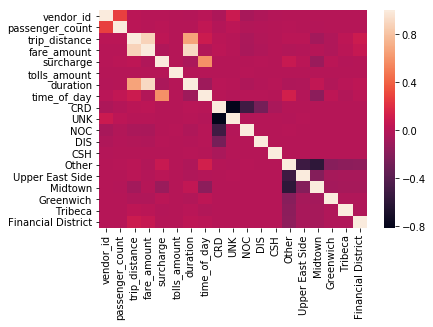

In [9]:
sns.heatmap(x_train.corr())
x_train.corr()[x_train.corr().abs() > 0.99]

In [10]:
def print_heavily_correlated_features(df, threshold=0.7):
  corr = df.corr().abs()
  corr = corr[corr > threshold]
  print(corr.count().sort_values(ascending=False) - 1)

print_heavily_correlated_features(x_train, 0.7)

fare_amount           2
UNK                   1
CRD                   1
trip_distance         1
duration              1
passenger_count       0
surcharge             0
tolls_amount          0
time_of_day           0
Financial District    0
Tribeca               0
NOC                   0
DIS                   0
CSH                   0
Other                 0
Upper East Side       0
Midtown               0
Greenwich             0
vendor_id             0
dtype: int64


## Logistic Regression

In [12]:
# Fit the model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# calculate the score
train_score = logreg.score(x_train, y_train)
test_score = logreg.score(x_test, y_test)
print('The train score is {} and the test score is {}'.format(train_score, test_score))

The train score is 0.5601362598058598 and the test score is 0.5602831477721231


In [ ]:
## Switch back to L1 regularization instead of L2 which is automatic 

## Classification Error

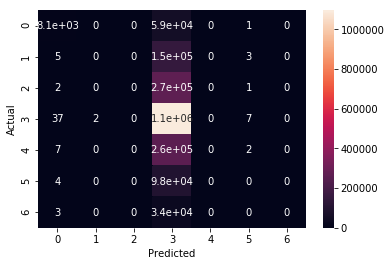

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(x_test)
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ax = sns.heatmap(cfm, annot=True)
ax.set(xlabel='Predicted', ylabel='Actual');

## CART Model 

In [16]:
# Train the CART model
cart_model = DecisionTreeClassifier(random_state=3,max_depth=3)
cart_model.fit(x_train, y_train)
train_score = cart_model.score(x_train, y_train)
test_score = cart_model.score(x_test, y_test)

In [17]:
# Print out summary of model performance 
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.559 and 0.559 over the testing data


In [37]:
#from graphviz import Source

In [24]:
# Visualize the decision tree
cart_graph = Source(export_graphviz(cart_model,
                   feature_names = df.columns[1:],
                   rounded = True, proportion = False, 
                  filled = True))
SVG(cart_graph.pipe(format='svg'))

NameError: name 'Source' is not defined

In [18]:
pd.Series(cart_model.feature_importances_, index=x_train.columns)

vendor_id             0.000000e+00
passenger_count       0.000000e+00
trip_distance         0.000000e+00
fare_amount           7.086477e-01
surcharge             0.000000e+00
tolls_amount          0.000000e+00
duration              0.000000e+00
time_of_day           0.000000e+00
CRD                   0.000000e+00
UNK                   0.000000e+00
NOC                   2.913521e-01
DIS                   0.000000e+00
CSH                   0.000000e+00
Other                 0.000000e+00
Upper East Side       0.000000e+00
Midtown               0.000000e+00
Greenwich             0.000000e+00
Tribeca               1.606447e-07
Financial District    0.000000e+00
dtype: float64

In [19]:
cart_model.fit(x_test, y_test)
mdlAcc = np.mean((cart_model.predict(x_test) == y_test))
print('The accuracy of this model on the training data is {:.3f}'.format(round(mdlAcc,3)))

The accuracy of this model on the training data is 0.559


## Fit and score model method

In [22]:
def fit_and_score_model(mdl, x_train, x_test, y_train, y_test, random_state=0):
    """
    This function will fit and score the input mdl to the x_train and y_train 
    data, and score the mdl on y_train and y_test. To ensure results are 
    reproducible we can also set a random state.
    """
  
    # Fit an arbitrary model
    mdl.fit(x_train, y_train)
    
    # Calculate the score of the model on training and testing data
    train_score = mdl.score(x_train, y_train)
    test_score = mdl.score(x_test, y_test)
  
    # Print scores to terminal
    print('the accuracy on the: \n\t training data is {}'.format(round(train_score,3)))
    print('\t testing data is {}'.format(round(test_score, 3)))
    
    return train_score, test_score

### Random Forest 

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
depths = [2, 3, 4, 5, 6, 7]
accuracy = pd.Series(index=depths)
cheat_scores = {}

for max_depth in depths:

    # Initialize the model
    rf_baseline_model = RandomForestClassifier(
        random_state = 0, 
        max_depth = max_depth,
        n_estimators = 50, max_features = 0.2
    )
    
    # Fit and train model
    print('For {} max_depth '.format(max_depth), end='')
    train_score, test_score = fit_and_score_model(rf_baseline_model, x_train, x_test, y_train, y_test)
    
    # Save model performance to dataframe
    cheat_scores[max_depth] = test_score
    

For 2 max_depth the accuracy on the: 
	 training data is 0.559
	 testing data is 0.559
For 3 max_depth the accuracy on the: 
	 training data is 0.56
	 testing data is 0.56
For 4 max_depth the accuracy on the: 
	 training data is 0.56
	 testing data is 0.56
For 5 max_depth the accuracy on the: 
	 training data is 0.56
	 testing data is 0.56
For 6 max_depth the accuracy on the: 
	 training data is 0.56
	 testing data is 0.56
For 7 max_depth the accuracy on the: 
	 training data is 0.56
	 testing data is 0.56


### Manual feature selection

In [24]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'surcharge',
       'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount', 'duration',
       'time_of_day', 'CRD', 'UNK', 'NOC', 'DIS', 'CSH', 'tip_percent',
       'tip_amount_binned', 'Other', 'Upper East Side', 'Midtown', 'Greenwich',
       'Tribeca', 'Financial District'],
      dtype='object')

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data[['Tribeca','fare_amount','NOC']], data['tip_percent'], test_size=0.30, random_state=1)

In [32]:
# Train the CART model
cart_model = DecisionTreeClassifier(random_state=3,max_depth=3)
cart_model.fit(x_train, y_train)
train_score = cart_model.score(x_train, y_train)
test_score = cart_model.score(x_test, y_test)

In [33]:
# Print out summary of model performance 
print('The score of this model over training data is {:.3f} and {:.3f} over the testing data'.format(train_score, test_score))

The score of this model over training data is 0.559 and 0.559 over the testing data


In [34]:
rf_baseline_model = RandomForestClassifier(
        random_state = 0, 
        max_depth = max_depth,
        n_estimators = 50, max_features = 0.2)

In [35]:
train_score, test_score = fit_and_score_model(rf_baseline_model, x_train, x_test, y_train, y_test)

the accuracy on the: 
	 training data is 0.56
	 testing data is 0.56
